# Lambda CSV analysis example


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Working with multiple files as one Data Frame

```bash
# EDM4EIC with root-tree
k_lambda_5x41_5000evt_001.edm4eic.root
k_lambda_5x41_5000evt_002.edm4eic.root
...

# Corresponding CSV files:
k_lambda_5x41_5000evt_001.mcdis.csv
k_lambda_5x41_5000evt_001.mcpart_lambda.csv
k_lambda_5x41_5000evt_002.mcdis.csv
k_lambda_5x41_5000evt_002.mcpart_lambda.csv
...
```

Each file such as `k_lambda_5x41_5000evt_001.edm4eic.root` is based on the processing 5000-events.
It is convenient to have files split in small chunks like this, but
analysis-wise 5k events are not statistically significant.
So to get results, we want to combine several files in one dataframe.
In general it is simple with pandas, but we have one problem.
When we have multiple CSV files from different runs or datasets, each file starts its event numbering from 0:

```
File 1: evt = [0, 1, 2, 3, 4, ...]
File 2: evt = [0, 1, 2, 3, 4, ...]  ← ID Collision!
File 3: evt = [0, 1, 2, 3, 4, ...]  ← ID Collision!
```

**Problem**: Event 0 from File 1 is completely different from Event 0 from File 2, but they have the same ID!

**Solution**: Global Unique Event IDs

We need to create globally unique event IDs across all files that we open:


In [4]:
def concat_csvs_with_unique_events(files):
    """Load and concatenate CSV files with globally unique event IDs"""
    dfs = []
    offset = 0

    for file in files:
        df = pd.read_csv(file)
        df['evt'] = df['evt'] + offset
        offset = df['evt'].max() + 1
        dfs.append(df)

    return pd.concat(dfs, ignore_index=True)


In [12]:
files_5x41 = [
    r"C:\data\meson-structure\csv\k_lambda_5x41_5000evt_001.reco_dis.csv.zip",
    r"C:\data\meson-structure\csv\k_lambda_5x41_5000evt_002.reco_dis.csv.zip",
    r"C:\data\meson-structure\csv\k_lambda_5x41_5000evt_003.reco_dis.csv.zip",
    r"C:\data\meson-structure\csv\k_lambda_5x41_5000evt_004.reco_dis.csv.zip",
    r"C:\data\meson-structure\csv\k_lambda_5x41_5000evt_005.reco_dis.csv.zip",
    r"C:\data\meson-structure\csv\k_lambda_5x41_5000evt_006.reco_dis.csv.zip",
    r"C:\data\meson-structure\csv\k_lambda_5x41_5000evt_007.reco_dis.csv.zip",
    r"C:\data\meson-structure\csv\k_lambda_5x41_5000evt_008.reco_dis.csv.zip",
    r"C:\data\meson-structure\csv\k_lambda_5x41_5000evt_009.reco_dis.csv.zip",
]

# df = pd.read_csv(r"C:\data\meson-structure\csv\k_lambda_5x41_5000evt_001.reco_dis.csv.zip")

reco_dis_5x41 = concat_csvs_with_unique_events(files_5x41)
reco_dis_5x41


,evt,da_x,da_q2,da_y,da_nu,da_w,esigma_x,esigma_q2,esigma_y,esigma_nu,...,sigma_x,sigma_q2,sigma_y,sigma_nu,sigma_w,mc_x,mc_q2,mc_y,mc_nu,mc_w
0,0,0.331693,105.5530,0.387979,169.5810,14.61350,0.485111,127.58900,0.320661,140.1570,...,0.485111,153.96900,0.386960,169.1360,12.81800,0.646321,126.959642,0.239083,104.678778,70.355051
1,1,0.246381,74.8769,0.370522,161.9510,15.16280,0.395020,94.82940,0.292682,127.9280,...,0.395020,120.16900,0.370891,162.1120,13.59860,0.644567,96.148082,0.181773,79.490282,53.899290
2,2,2.802830,1040.9500,0.452801,197.9140,NaN,0.603230,482.44700,0.975078,426.1960,...,0.603230,221.62300,0.447925,195.7830,12.11000,0.767213,483.945779,0.768830,336.141239,147.718422
3,3,0.609999,209.3620,0.418447,182.8980,11.60750,0.630800,211.30100,0.408398,178.5060,...,0.630800,206.20000,0.398537,174.1960,11.02570,0.621466,213.257824,0.418433,182.864142,130.775150
4,4,1.829470,673.2550,0.448669,196.1080,NaN,0.660962,405.03200,0.747110,326.5530,...,0.660962,245.65400,0.453126,198.0560,11.26440,0.725492,411.711279,0.690854,302.413703,156.661713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,44995,0.811759,287.8940,0.432392,188.9940,8.22440,0.789915,283.72800,0.437919,191.4090,...,0.789915,277.99500,0.429071,187.5420,8.64959,0.706152,276.931176,0.478717,208.984898,116.118546
44996,44996,0.244653,74.7302,0.372407,162.7750,15.21850,0.413372,97.11510,0.286429,125.1950,...,0.413372,126.11600,0.371965,162.5820,13.41100,0.633699,97.293865,0.187311,81.817056,57.119799
44997,44997,0.545049,22.7649,0.050922,22.2573,4.45894,0.031869,5.16426,0.197564,86.3531,...,0.031869,1.16367,0.044517,19.4581,6.01918,0.007580,4.891405,0.786520,343.895285,641.323605
44998,44998,0.220533,67.3993,0.372610,162.8640,15.46290,0.433080,94.43390,0.265847,116.1990,...,0.433080,132.24500,0.372291,162.7240,13.19070,0.862935,93.927120,0.132827,58.003476,15.799312


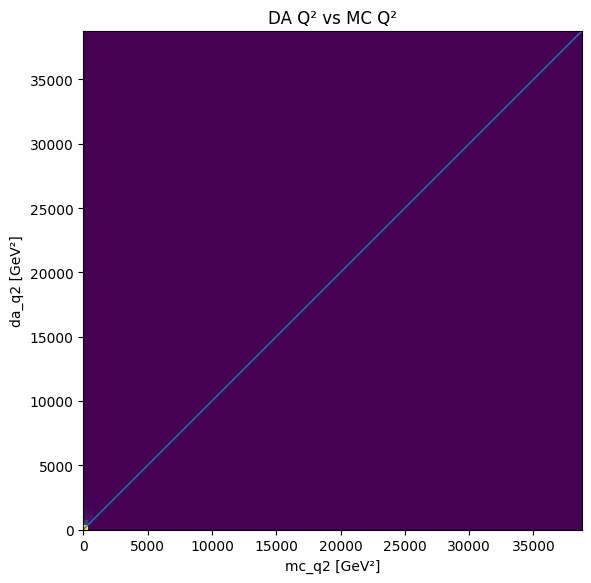

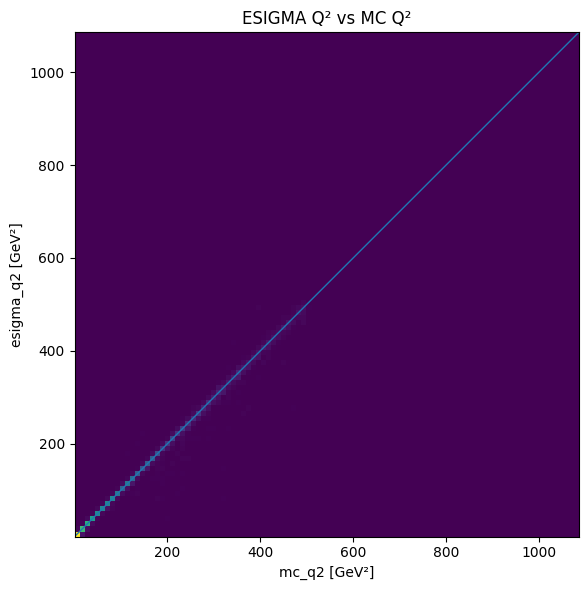

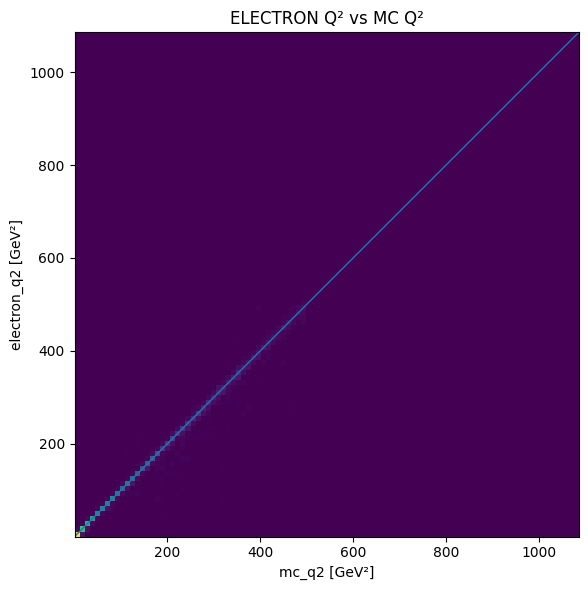

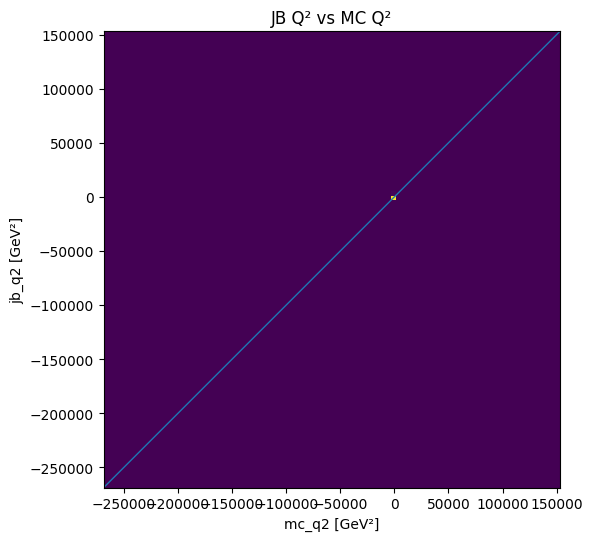

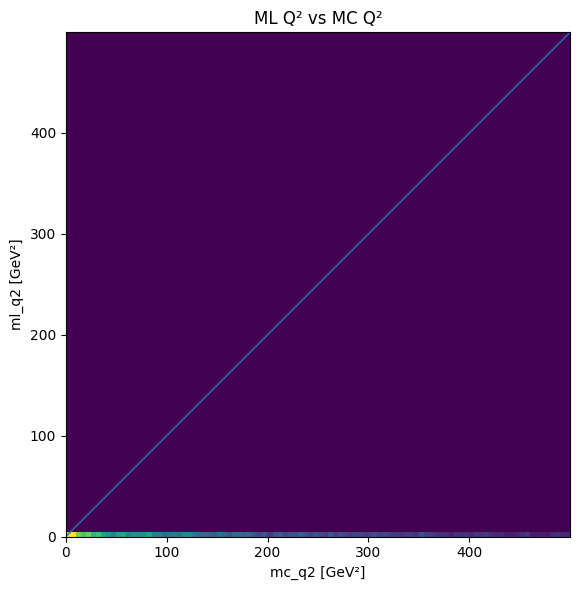

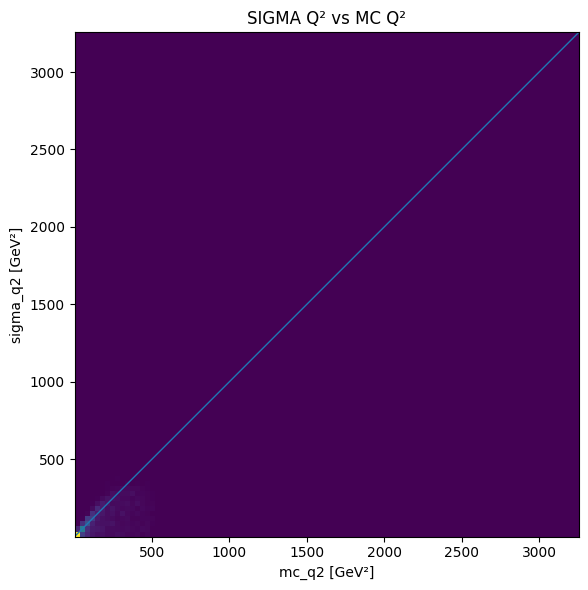

In [13]:
methods = ['da', 'esigma', 'electron', 'jb', 'ml', 'sigma']
variable = 'q2'  # change this if you want a different kinematic variable

for method in methods:
    plt.figure(figsize=(6, 6))
    x = df['mc_q2']
    y = df[f'{method}_q2']
    mask = ~(x.isna() | y.isna())
    x_clean, y_clean = x[mask], y[mask]

    lim_min = np.nanmin([x_clean.min(), y_clean.min()])
    lim_max = np.nanmax([x_clean.max(), y_clean.max()])

    plt.hist2d(x_clean, y_clean, bins=100,
               range=[[lim_min, lim_max], [lim_min, lim_max]])
    plt.plot([lim_min, lim_max], [lim_min, lim_max], linewidth=1)
    plt.gca().set_aspect('equal', 'box')

    plt.xlabel('mc_q2 [GeV²]')
    plt.ylabel(f'{method}_q2 [GeV²]')
    plt.title(f'{method.upper()} Q² vs MC Q²')
    plt.tight_layout()
    plt.show()